In [6]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Let's create a toy data for Principal Component Analysis. A training data $\mathbf{X}$ with two features centered around 0

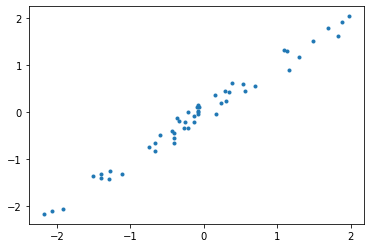

In [7]:
x1 = np.random.normal(size=(50,))
x2 = 1.0 * x1 + 0.5 * np.random.rand(50) -0.25
X = np.hstack((x1.reshape(-1,1), x2.reshape(-1,1)))
plt.plot(X[:,0], X[:,1], ".")

Center $\mathbf{X}$ and decompose using SVD. $\mathbf{V}$ contains the principal axis unit vectors.

In [8]:
X_centered = X - X.mean(axis=0)
U, S, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:,0]
c2 = Vt.T[:,1]

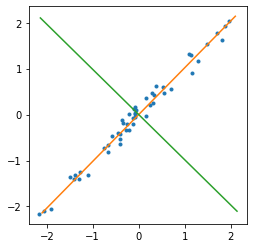

In [9]:
dom = np.linspace(-3.0, 3.0, 50)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal')
plt.plot(X[:,0], X[:,1], ".")
plt.plot(dom * c1[0], dom * c1[1])
plt.plot(dom * c2[0], dom * c2[1])


In [10]:
np.dot(c1,c2)

0.0

Project data onto priciple axes

In [38]:
X_proj = X_centered.dot(Vt.T[:, :1])
X_proj_perp = X_centered.dot(Vt.T[:, 1:])

(-4.0, 4.0)

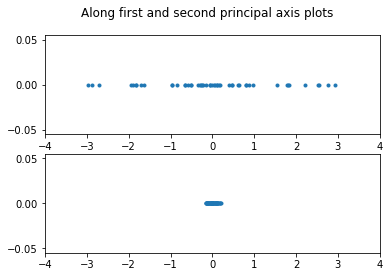

In [45]:
fig, axs = plt.subplots(2)
fig.suptitle('Along first and second principal axis plots')
axs[0].plot(X_proj, np.zeros_like(X_proj), ".")
axs[1].plot(X_proj_perp, np.zeros_like(X_proj_perp), ".")

axs[0].set_xlim([-4,4])
axs[1].set_xlim([-4,4])


Use sklearn to do PCA analysis

In [50]:
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

pca.components_

array([[-0.70089715, -0.71326235],
       [ 0.71326235, -0.70089715]])